<a href="https://colab.research.google.com/github/Edrodriguezcarcamo/Ambito-Termico/blob/main/4_Ciclo_de_absorci%C3%B3n_agua_bromuro_de_litio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ciclo de absorción agua-bromuro de litio

Se tiene un sistema de refrigeración por absorción que opera con agua-bromuro de litio. El condensador tiene una temperatura de 50 °C, el evaporador una temperatura de 5 °C, el generador opera con una temperatura de 110 °C y el absorbedor con una temperatura de 40 °C. Asuma que la solución fuerte tiene una temperatura de 40 °C a la salida del intercambiador de calor. Considere condiciones de saturación a las salidas del condensador y del evaporador. Si la solución fuerte tiene una composición de 0.66 y la solución débil de 0.578, determine:


1.   La transferencia de calor específica del evaporador, condensador, absorbedor y generador
2.   El COP del sistema



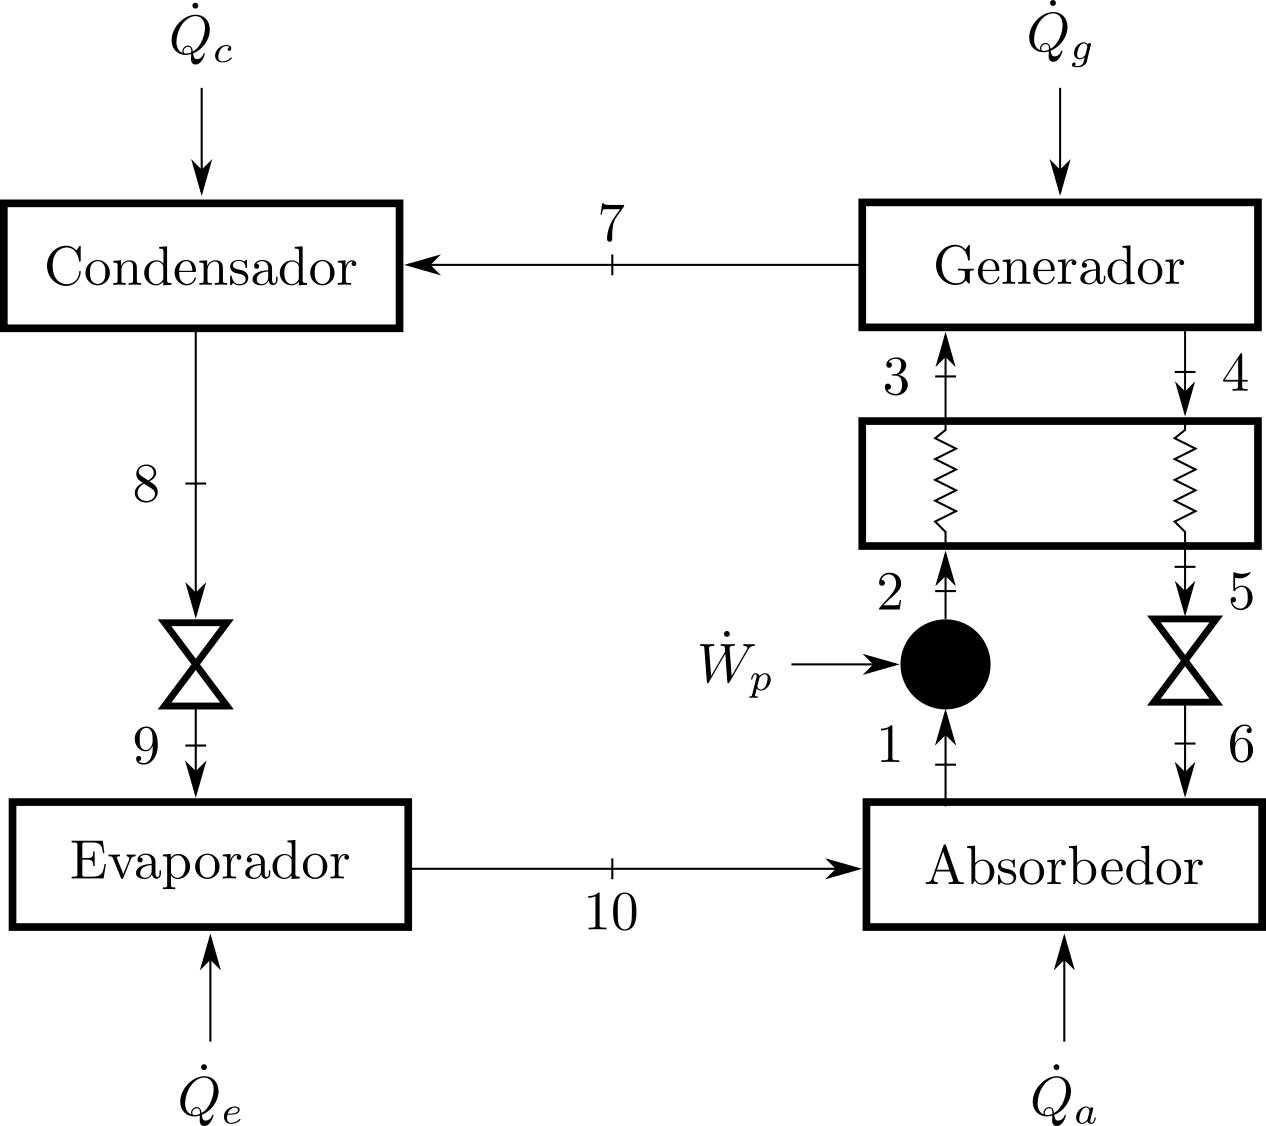

Para resolver el problema, primero vamos a escribir los datos que nos da el enunciado como variables:

In [2]:
pip install CoolProp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 44.0 MB/s eta 0:00:00


In [3]:
import CoolProp.CoolProp as cp

# Condensador
T_8 = 50 + 273.15 # K
# Evaporador
T_10 = 5 + 273.15 # K
# Generador
T_7 = 110 + 273.15 # K
# Generador
T_4 = 110 + 273.15 # K
# Absorbedor
T_1 = 40 + 273.15 # K
# Intercambiador de calor de solución
T_5 = 40 + 273.15 # K

refrigerant = 'water'

Las presiones del sistema no son mencionadas en el enunciado. Sin embargo, sabemos que existen solo **dos presiones** en un ciclo de refrigeración por absorción, la presión de alta y la presión de baja. Para conocer estas presiones, debemos fijarnos en el **condensador** y en el **evaporador**. En ambos equipos está ocurriendo un **cambio de fase a presión constante**, y se considera condiciones de **saturación** a las salidas de cada equipo. Por ende, las presiones de alta y de baja corresponden a las **presiones de saturación** para las temperaturas correspondientes del condensador y del evaporador. En coolprop, esto se obtendría de la siguiente forma:

In [6]:
# Presión de alta
P_8 = cp.PropsSI('P','T',T_8,'Q',1, refrigerant)
print(f"La presión de alta es {P_8/1000:.2f} [kPa]")

La presión de alta es 12.35 [kPa]


In [7]:
# Presión de baja
P_10 = cp.PropsSI('P','T',T_10,'Q',1, refrigerant)
print(f"La presión de baja es {P_10/1000:.2f} [kPa]")

La presión de baja es 0.87 [kPa]


Ahora, debemos indicarle a Coolprop cuales son las composiciones de las soluciones fuerte y débil. Esto se realiza de la siguiente forma:

In [8]:
epsilon_rich = 0.66
solution_rich = 'INCOMP::LiBr[' + str(epsilon_rich) + ']'
epsilon_poor = 0.578
solution_poor = 'INCOMP::LiBr[' + str(epsilon_poor) + ']'

Comenzaremos por obtener las entalpías por donde sólo se encuentra refrigerante, lo que corresponde a los estados 7, 8, 9 y 10. 

# Estado 7

En el estado 7 no se indica si existen condiciones de saturación, por lo que no podemos asumir que la calidad es igual a 1. Sin embargo, tenemos otro dato con el cual poder obtener la entalpía, y es la presión $P_{7}$

In [9]:
P_7 = P_8
h_7 = cp.PropsSI('H', 'T', T_7, 'P', P_7, refrigerant)

print(f'Entalpía 7: {h_7/1000:.2f} [kJ/kg]')

Entalpía 7: 2706.27 [kJ/kg]


# Estado 8

In [10]:
h_8 = cp.PropsSI('H', 'P', P_8, 'Q', 0, refrigerant)

print(f'Entalpía 8: {h_8/1000:.2f} [kJ/kg]')

Entalpía 8: 209.34 [kJ/kg]


# Estado 9

In [12]:
h_9 = h_8
P_9 = P_10

print(f'Entalpía 9: {h_9/1000:.2f} [kJ/kg]')

Entalpía 9: 209.34 [kJ/kg]


# Estado 10

In [13]:
h_10 = cp.PropsSI('H', 'P', P_10, 'Q', 1, refrigerant)

print(f'Entalpía 10: {h_10/1000:.2f} [kJ/kg]')

Entalpía 10: 2510.06 [kJ/kg]


Ahora, comenzaremos por la parte donde se encuentra la solución, que corresponde a los estados 1, 2, 3, 4, 5 y 6.

# Estado 1

In [17]:
P_1 = P_10
h_1 = cp.PropsSI('H', 'T', T_1, 'Q', 0, solution_rich)

print(f'Entalpía 1: {h_1/1000:.2f} [kJ/kg]')

Entalpía 1: 32.51 [kJ/kg]


# Estado 2

In [18]:
P_2 = P_7
h_2 = h_1

print(f'Entalpía 2: {h_2/1000:.2f} [kJ/kg]')

Entalpía 2: 32.51 [kJ/kg]


# Estado 3

En este estado, el enunciado no nos da ningún dato. Sin embargo, la entalpía de este estado no es necesario conocerla ya que no se va a utilizar para ningún cálculo de las tasas de calor de los cuatro equipos importantes. Por ende, se puede saltar este estado sin ningún problema.

In [ ]:
P_3 = P_2

# Estado 4

In [20]:
P_4 = P_3
h_4 = cp.PropsSI('H', 'T', T_4, 'Q', 0, solution_poor)

print(f'Entalpía 4: {h_4/1000:.2f} [kJ/kg]')

Entalpía 4: 177.69 [kJ/kg]


# Estado 5


In [21]:
P_5 = P_4
h_5 = cp.PropsSI('H', 'T', T_5, 'Q', 0, solution_poor)

print(f'Entalpía 5: {h_5/1000:.2f} [kJ/kg]')

Entalpía 5: 37.39 [kJ/kg]


# Estado 6

In [22]:
P_6 = P_1
h_6 = h_5

print(f'Entalpía 6: {h_6/1000:.2f} [kJ/kg]')

Entalpía 6: 37.39 [kJ/kg]


# Cálculo de los Resultados
Ahora que ya calculamos todas las entalpías, podemos comenzar a calcular los flujos de calor. 

El flujo de calor específico que sale del condensador se expresa como:

$\dot{q}_{c}=(h_{7}-h_{8})$

In [23]:
q_c = h_7 - h_8

print(f"El flujo de calor específico en el condensador es {q_c/1000:.2f} [kJ/kg]")

El flujo de calor específico en el condensador es 2496.92 [kJ/kg]


El flujo de calor específico que entra en el evaporador se expresa como:

$\dot{q}_{e}=(h_{10}-h_{9})$

In [24]:
q_e = h_10 - h_9

print(f"El flujo de calor específico en el evaporador es {q_e/1000:.2f} [kJ/kg]")

El flujo de calor específico en el evaporador es 2300.72 [kJ/kg]


El flujo de calor específico que sale del absorbedor se expresa como:

$\dot{q}_{a}=(h_{10}-h_{1})+f(h_{6}-h_{1})$

en donde $f$ se le llama al factor de circulación y se expresa como:

$f = \frac{x_{4}}{x_{3}-x_{4}} $

In [28]:
f = epsilon_poor/(epsilon_rich-epsilon_poor)

print(f"El factor de circulación es {f:.4f}")

El factor de circulación es 7.0488


In [29]:
q_a = (h_10 - h_1) + f * (h_6 - h_1)

print(f"El flujo de calor específico en el absorbedor es {q_a/1000:.2f} [kJ/kg]")

El flujo de calor específico en el absorbedor es 2511.93 [kJ/kg]


El flujo de calor específico que entra al generador se expresa como:

$\dot{q}_{g}=(h_{7}-h_{2})+f(h_{5}-h_{2})$

In [30]:
q_g = (h_7 - h_2) + f * (h_5 - h_2)

print(f"El flujo de calor específico en el generador es {q_g/1000:.2f} [kJ/kg]")

El flujo de calor específico en el generador es 2708.14 [kJ/kg]


Finalmente, el COP del sistema se calcula de la siguiente forma:

$COP=\frac{q_{e}}{q_{g}}$

In [33]:
COP = q_e / q_g

print(f"El COP del sistema de absorción es {COP:.2f}")

El COP del sistema de absorción es 0.85
